## Pymaceuticals
In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
* Create a plot that shows how the tumor volume changes over time for each treatment.
* Create a plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* Create a plot that shows the number of mice still alive through the course of treatment (Survival Rate).
* Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
* Include at least 3 observations about the results of the study.


In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID"])

# Display the data table for preview
drug_trial

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [22]:
# Sort table by Drug then by Timepoint
tumor_sdrug_stime = drug_trial.sort_values(["Drug","Timepoint"])
# Store a table with the index as Timepoint, the columns as the Drug names, and the values as the mean of the
# Tumor Volumes
tumor_mean = tumor_sdrug_stime.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Store a table with the index as Timepoint, the columns as the Drug names and the values as the standard error
# of the Tumor Volumes
tumor_sem = tumor_sdrug_stime.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)",aggfunc=sem)
# Preview the standard error DataFrame
tumor_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


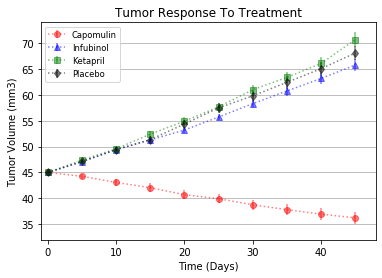

In [23]:
# Generate a plot of the mean of the Tumor Volumes over 45 days for Capomulin, Infubinol, Ketapril, and Placebo 
# (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(tumor_mean.index,tumor_mean["Capomulin"], yerr=tumor_sem["Capomulin"], fmt=":o", color="r", alpha=0.5, 
            label="Capomulin")
ax.errorbar(tumor_mean.index,tumor_mean["Infubinol"], yerr=tumor_sem["Infubinol"], fmt=":^", color="b", alpha=0.5, 
            label="Infubinol")
ax.errorbar(tumor_mean.index,tumor_mean["Ketapril"], yerr=tumor_sem["Ketapril"], fmt=":s", color="g", alpha=0.5, 
            label="Ketapril")
ax.errorbar(tumor_mean.index,tumor_mean["Placebo"], yerr=tumor_sem["Placebo"], fmt=":d", color="black", alpha=0.5, 
            label="Placebo")
ax.set_xlim(-1, 48)
ax.set_ylim(32, 74)
ax.set_title("Tumor Response To Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.yaxis.grid(True)
plt.legend(loc="upper left", fontsize="small", fancybox=True)
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [24]:
# Store a table with the index as Timepoint, the columns as the Drug names, and the values as the mean of the
# Metastatic Sites
metastatic_mean = tumor_sdrug_stime.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview DataFrame
metastatic_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [25]:
# Store a table with the index as Timepoint, the columns as the Drug names, and the values as the standard error
# of the Metastatic Sites
metastatic_sem = tumor_sdrug_stime.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites",aggfunc=sem)
# Preview DataFrame
metastatic_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


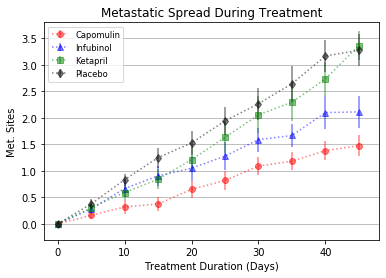

In [26]:
# Generate a plot of the mean of the Metastatic Sites over 45 days for Capomulin, Infubinol, Ketapril, and Placebo 
# (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(metastatic_mean.index,metastatic_mean["Capomulin"], yerr=metastatic_sem["Capomulin"], fmt=":o", color="r", alpha=0.5, 
            label="Capomulin")
ax.errorbar(metastatic_mean.index,metastatic_mean["Infubinol"], yerr=metastatic_sem["Infubinol"], fmt=":^", color="b", alpha=0.5, 
            label="Infubinol")
ax.errorbar(metastatic_mean.index,metastatic_mean["Ketapril"], yerr=metastatic_sem["Ketapril"], fmt=":s", color="g", alpha=0.5, 
            label="Ketapril")
ax.errorbar(metastatic_mean.index,metastatic_mean["Placebo"], yerr=metastatic_sem["Placebo"], fmt=":d", color="black", alpha=0.5, 
            label="Placebo")
ax.set_xlim(-2, 48)
ax.set_ylim(-0.3, 3.8)
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.yaxis.grid(True)
plt.legend(loc="upper left", fontsize="small", fancybox=True)
# Show the Figure
plt.show()

## Survival Rates

In [27]:
# Store a table with the index as Timepoint, the columns as the Drug names, and the values as the count of mice still 
# in the trial with corresponding drug and timepoint
mouse_survival = tumor_sdrug_stime.pivot_table(index="Timepoint", columns="Drug", values="Mouse ID", 
               aggfunc=lambda x: x.value_counts().count())

# Preview DataFrame
mouse_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [28]:
# Create a table of the percentage of mice alive at each timepoint
mouse_survival_rate = (mouse_survival/25)*100

In [29]:
# Preview DataFrame
mouse_survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


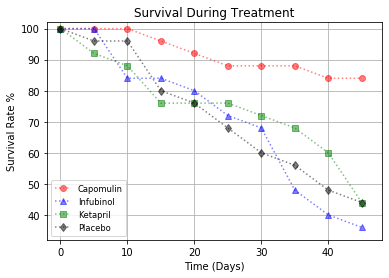

In [30]:
# Generate a plot of the survival rate of the mice over 45 days for Capomulin, Infubinol, Ketapril, and Placebo 
fig, ax = plt.subplots()
ax.plot(mouse_survival_rate.index,mouse_survival_rate["Capomulin"],linestyle=":", marker="o", color="r", alpha=0.5, 
            label="Capomulin")
ax.plot(mouse_survival_rate.index,mouse_survival_rate["Infubinol"], linestyle=":", marker="^", color="b", alpha=0.5, 
            label="Infubinol")
ax.plot(mouse_survival_rate.index,mouse_survival_rate["Ketapril"], linestyle=":", marker="s", color="g", alpha=0.5, 
            label="Ketapril")
ax.plot(mouse_survival_rate.index,mouse_survival_rate["Placebo"], linestyle=":", marker="d", color="black", alpha=0.5, 
            label="Placebo")
ax.set_xlim(-2, 48)
ax.set_ylim(32, 102)
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate %")
ax.grid(True)
plt.legend(loc="lower left", fontsize="small", fancybox=True)

# Show the Figure
plt.show()

In [31]:
# Preview the table of means of tumor volumes
tumor_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Summary Bar Graph

In [32]:
# Calculate the percent changes in the mean of the Tumor Volumes for each drug
per_change=[]
# Subtract value at timepoint 0 from value at timepoint 45 then divide by value at timepoint 45, then times 100
per_change = (tumor_mean.pct_change(periods=9)*100)
# Assign the 10th row, as the other rows have null values
per_change = per_change.iloc[9,:]
per_change
# Display the data to confirm

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

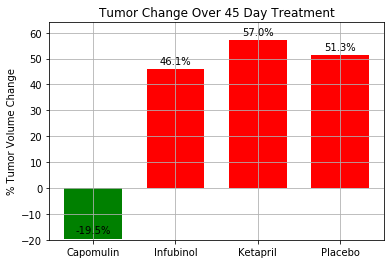

In [33]:
# Make simple bar graph where the x values are the drugs and the y axis is the percent tumor volume change
# Color code the bars
# Call a function "autolabel" that will label the bars with the specified percent tumor volume change number
# Cite: funtion autolabel
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

drugs = "Capomulin","Infubinol","Ketapril","Placebo"
tumor_vol_change = [-19.5, 46.1, 57.0, 51.3]
fig, ax = plt.subplots()
drug_bar = ax.bar(drugs, tumor_vol_change, width = 0.7, color = ("g","r","r","r"))
ax.set_ylim(-20, 64)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(True)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(drug_bar)

# Show the Figure
fig.show()

## Observations

1) Capomulin is the best performing drug in the study. With Capomulin the tumor volume decreased by 19.5% and the survival rate of the group of mice was 84% over the 45 days.

2) Infubinol seemed somewhat hopeful as the metastatic spread was just over 2; however, the tumor volume change increased to 46.1% and the survival rate was actually worse than the placebo at 36% over the 45 days.

3) Ketapril seemed to have little to no effect, mirroring the placebo with the exact same survival rate of 44% over the 45 days.

4) The competition had a drug in the study that was comparable to Capomulin named Ramicane. The rest of the drugs were subpar or in line with the placebo results.

5) Pymaceuticals should focus its energy on Capomulin and get any information it can on Ramicane. After perhaps some revisions and a few more studies and trials, the company may want to take the next step in bringing the drug to market.